## 1. Exploratory Data Analysis (EDA): 
• Load the data and clean it (handle missing values, data types, encoding, extra if any). 
 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

df = pd.read_csv("insurance.csv")
df.shape
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df['smoker'].unique())


['yes' 'no']


In [3]:
#transform categorical variables to numerical
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})


In [4]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder for 'region' column
ohe = OneHotEncoder(sparse_output=False, drop='first') 
df = pd.concat([df, pd.DataFrame(ohe.fit_transform(df[['region']]), columns=ohe.get_feature_names_out(['region']))], axis=1)
df.drop(columns=['region'], inplace=True)

df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


## 2. Preprocessing And visualization 
• Select appropriate numeric features for regression. 


• Visualize the data


• Split the data into training and testing sets (e.g., 80/20). 

In [5]:
#data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
#List of continous values
continous_vals = ['age', 'bmi', 'children', 'charges']
#remoove outliers
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in continous_vals:
    df = remove_outliers(df, col)
    
df.reset_index(drop=True, inplace=True)

In [6]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


visulaize the data



Scatter plot of Age vs Charges, BMI vs Charges, Childern vs Charges


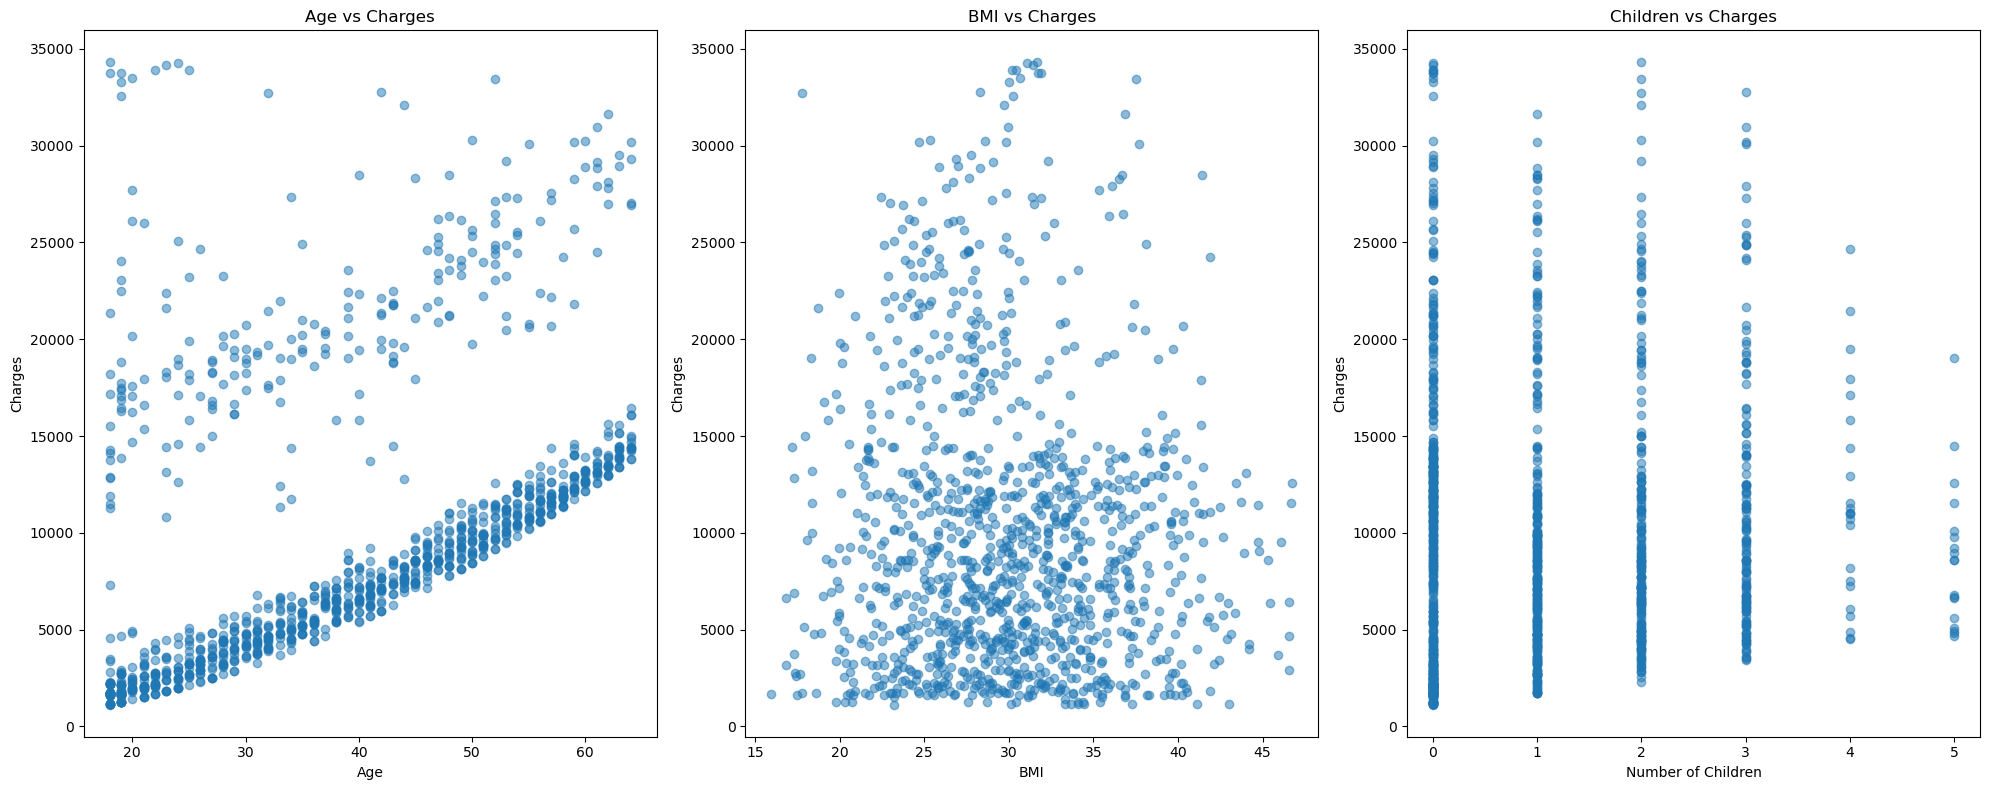

In [7]:
plt.figure(figsize=(20, 8))

# Scatter plot 1: Age vs Charges
plt.subplot(1, 3, 1) #
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Scatter plot 2: BMI vs Charges
plt.subplot(1, 3, 2) #
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Scatter plot 3: Children vs Charges
plt.subplot(1, 3, 3)
plt.scatter(df['children'], df['charges'], alpha=0.5)
plt.title('Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

Histogram of Charges, Age and BMI


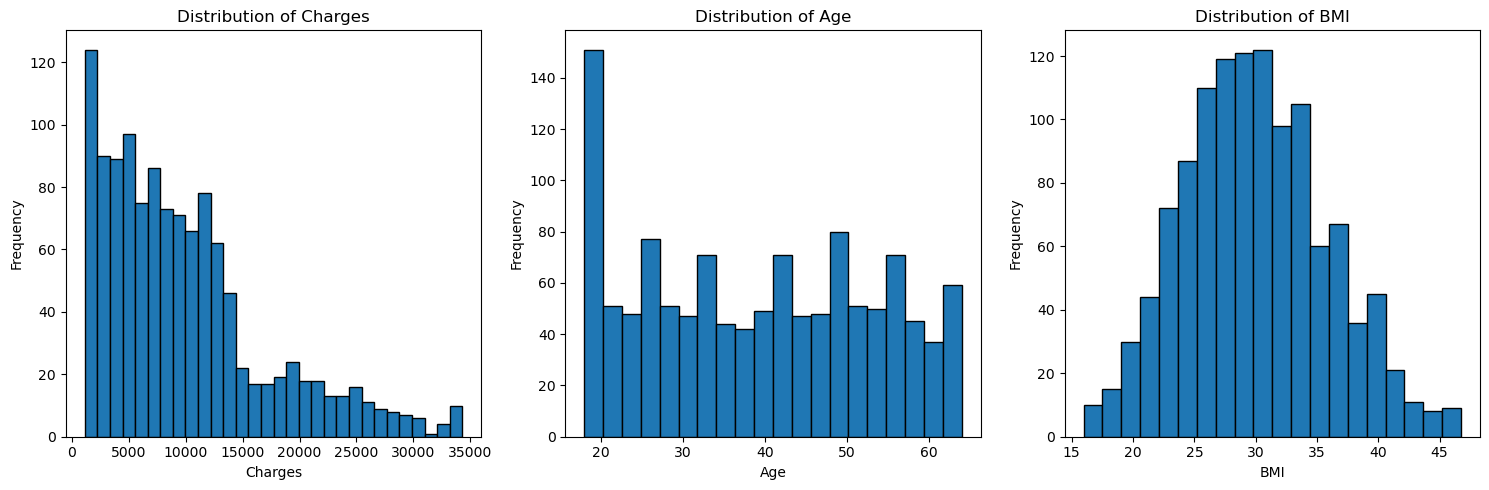

In [8]:
plt.figure(figsize=(15, 5))

# Histogram of Charges
plt.subplot(1, 3, 1)
plt.hist(df['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Histogram of Age
plt.subplot(1, 3, 2)
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram of BMI
plt.subplot(1, 3, 3)
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Box plot of Charges by Smoker, Chrages by sex

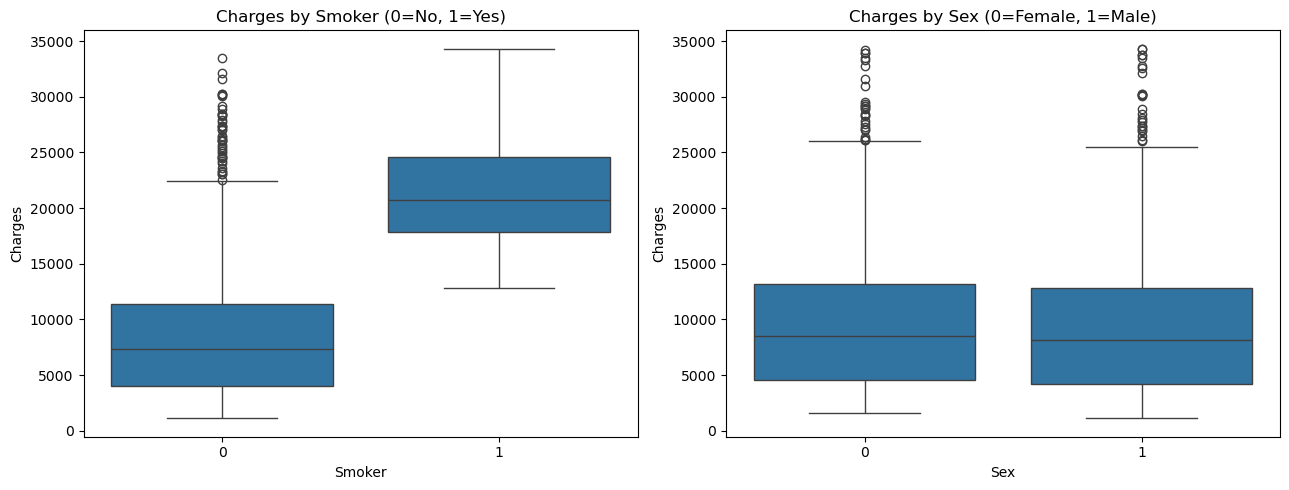

In [9]:
plt.figure(figsize=(13, 5))

# Box plot of Charges by Smoker
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker (0=No, 1=Yes)')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Box plot of Charges by Sex
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges by Sex (0=Female, 1=Male)')
plt.xlabel('Sex')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

In [10]:
df.shape

(1190, 9)

In [11]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020240,0.124055,0.037153,-0.062581,0.448052,-0.000196,-0.016840,0.016440
sex,-0.020240,1.000000,0.016407,0.016346,0.014343,-0.021925,0.003207,-0.002730,-0.005265
bmi,0.124055,0.016407,1.000000,0.007625,-0.260642,-0.064421,-0.112566,0.230877,0.013666
children,0.037153,0.016346,0.007625,1.000000,-0.002172,0.088297,0.012956,-0.015196,0.026417
smoker,-0.062581,0.014343,-0.260642,-0.002172,1.000000,0.596230,0.019726,-0.002430,-0.050097
charges,0.448052,-0.021925,-0.064421,0.088297,0.596230,1.000000,0.039487,-0.029676,-0.076996
region_northwest,-0.000196,0.003207,-0.112566,0.012956,0.019726,0.039487,1.000000,-0.340841,-0.332505
region_southeast,-0.016840,-0.002730,0.230877,-0.015196,-0.002430,-0.029676,-0.340841,1.000000,-0.330301
region_southwest,0.016440,-0.005265,0.013666,0.026417,-0.050097,-0.076996,-0.332505,-0.330301,1.000000


Correlation heatmap

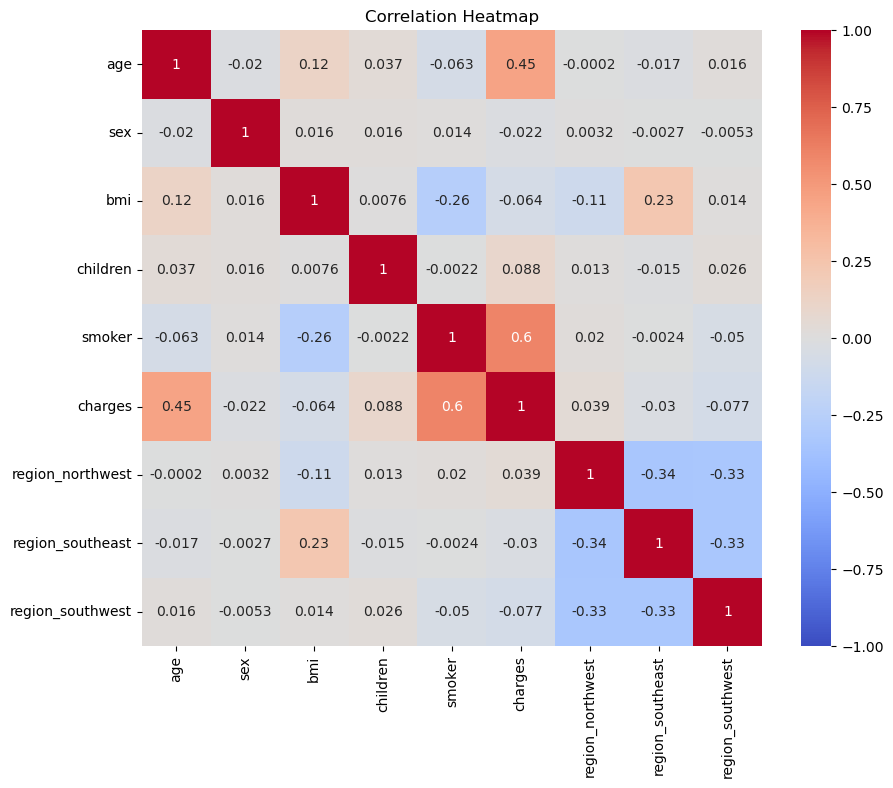

In [12]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Choose smoker because it has the heighest correlation

Simple LinearRegression with one feature
    
Smoker is chosen because it has the heighest correlation.

80 % Train
20 % Test

In [13]:
from sklearn.model_selection import train_test_split
y = df['charges']
X = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train)) #80% of data
print("Testing set size:", len(X_test))  #20% of data

Training set size: 952
Testing set size: 238


## 3. Simple Linear Regression: 
• Pick one feature that most correlates with the target variable. 


• Fit a simple linear regression model. 


• Visualize the regression line and report metrics (R², MSE).

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 35554071.0952
Root Mean Squared Error: 5962.7235
R-squared: 0.2624


plot the model as a scatterplot

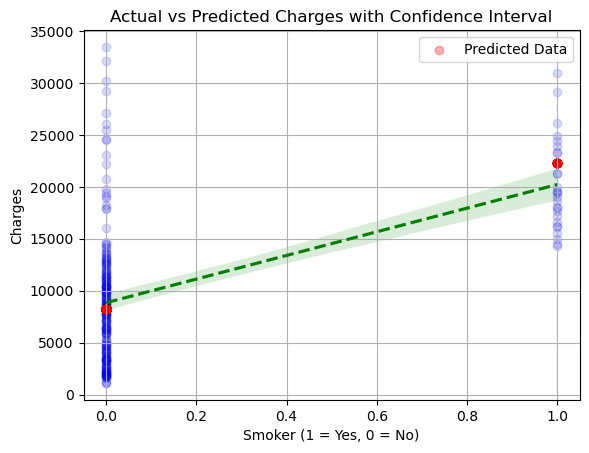

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'smoker': X_test, 'charges': y_test})

# Plot with regression line and confidence interval
sns.regplot(data=plot_data, x='smoker', y='charges', ci=95, scatter_kws={'color': 'blue', 'alpha': 0.15}, line_kws={'color': 'green', 'linestyle': '--'})

# Overlay predicted points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.3)

plt.title('Actual vs Predicted Charges with Confidence Interval')
plt.xlabel('Smoker (1 = Yes, 0 = No)')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()
#save plot for future use
plt.savefig('simple_linear_regg.png', dpi=300, bbox_inches='tight')

### Another simple regression model with continous values to compare to Polynomial Regression


##### Using Age vs Charges

In [16]:
from sklearn.model_selection import train_test_split
y = df['charges']
X = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train)) #80% of data
print("Testing set size:", len(X_test))  #20% of data

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Training set size: 952
Testing set size: 238
Mean Squared Error: 36915391.5169
Root Mean Squared Error: 6075.8038
R-squared: 0.2342


#### Plot the Results

Plot saved as 'age_vs_charges_plot_singel_linear_regg.png' and figure object stored in 'singel_linear_regg_plot'.


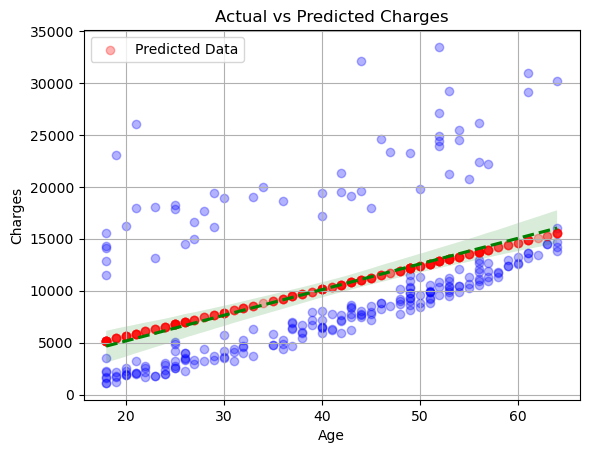

In [17]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Age': X_test, 'charges': y_test})

# Plot with regression line and confidence interval
sns.regplot(data=plot_data, x='Age', y='charges', ci=95, scatter_kws={'color': 'blue', 'alpha': 0.3}, line_kws={'color': 'green', 'linestyle': '--'})
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.3)

# Overlay predicted points


plt.title('Actual vs Predicted Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)

plt.savefig('age_vs_charges_plot_singel_linear_regg.png', dpi=300, bbox_inches='tight')

# Add before plt.show() if you want to store the figure object
singel_linear_regg_plot = plt.gcf()

# Modify the print statement to confirm saving
print("Plot saved as 'age_vs_charges_plot_singel_linear_regg.png' and figure object stored in 'singel_linear_regg_plot'.")


plt.show()

## 4. Multiple Linear Regression: 


• Use multiple features to predict the target. 


• Compare results with the simple linear regression

Split the data into 

80% Train 

20% test

In [18]:
# slpit the data into training and testing sets
X = df.drop(columns=['charges'])
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 22452312.4947
Root Mean Squared Error: 4738.3871
R-squared: 0.5342


Plot the visulization results.


Plot saved as 'age_vs_charges_plot_multiple_linear_regg.png' and figure object stored in 'multiple_linear_regg_plot'.


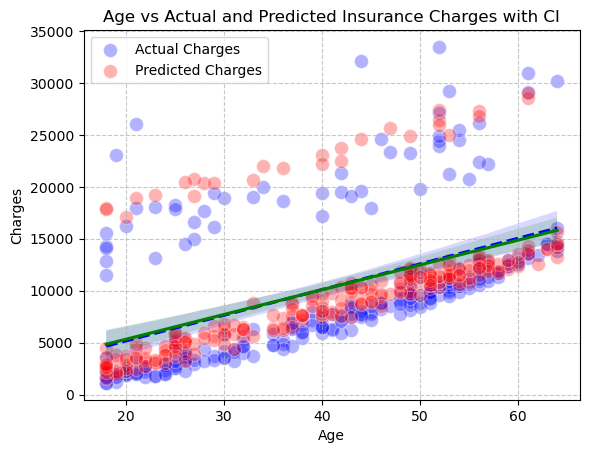

In [19]:
# Plot actual charges
# Create a DataFrame for plotting (note: column name is 'Age' with capital 'A')
plot_data = pd.DataFrame({
    'Age': X_test['age'],  # Feature from X_test (ensure this matches your DataFrame)
    'Actual Charges': y_test,  # Actual target values
    'Predicted Charges': y_pred  # Predicted target values
})

# Plot actual charges
sns.scatterplot(data=plot_data, x='Age', y='Actual Charges', color='blue', label='Actual Charges', alpha=0.3, s=100)

# Plot predicted charges
sns.scatterplot(data=plot_data, x='Age', y='Predicted Charges', color='red', label='Predicted Charges', alpha=0.3, s=100)

# Add regression line for actual data with CI
sns.regplot(data=plot_data, x='Age', y='Actual Charges', scatter=False, color='blue', 
            line_kws={'linestyle': '--', 'label': 'Actual Trend'}, ci=95)

# Add regression line for predicted data with CI
sns.regplot(data=plot_data, x='Age', y='Predicted Charges', scatter=False, color='green', 
            line_kws={'linestyle': '-', 'label': 'Predicted Trend'}, ci=95)

# Customize the plot
plt.title('Age vs Actual and Predicted Insurance Charges with CI', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Charges', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add before plt.show()
plt.savefig('age_vs_charges_plot_multiple_linear_regg.png', dpi=300, bbox_inches='tight')

# Add before plt.show() if you want to store the figure object
multiple_linear_regg_plot = plt.gcf()

# Modify the print statement to confirm saving
print("Plot saved as 'age_vs_charges_plot_multiple_linear_regg.png' and figure object stored in 'multiple_linear_regg_plot'.")

# Show the plot
plt.show()



## Polynomial Regression

Use the same variable as simple linear regression (eg:smoker)

Create the polynomial futuers




In [20]:
from sklearn.preprocessing import PolynomialFeatures


polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
df_polynomial = df['age'].values.reshape(-1, 1)
X_poly = polynomial_features.fit_transform(df_polynomial)
X_poly.shape

(1190, 3)

In [21]:
X_poly

array([[1.90000e+01, 3.61000e+02, 6.85900e+03],
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.80000e+01, 7.84000e+02, 2.19520e+04],
       ...,
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.10000e+01, 4.41000e+02, 9.26100e+03],
       [6.10000e+01, 3.72100e+03, 2.26981e+05]])

### Split the data into train and test


Polynomial Regression (Degree 2):
Mean Squared Error: 36477679.6589
Root Mean Squared Error: 6039.6755
R-squared: 0.2432


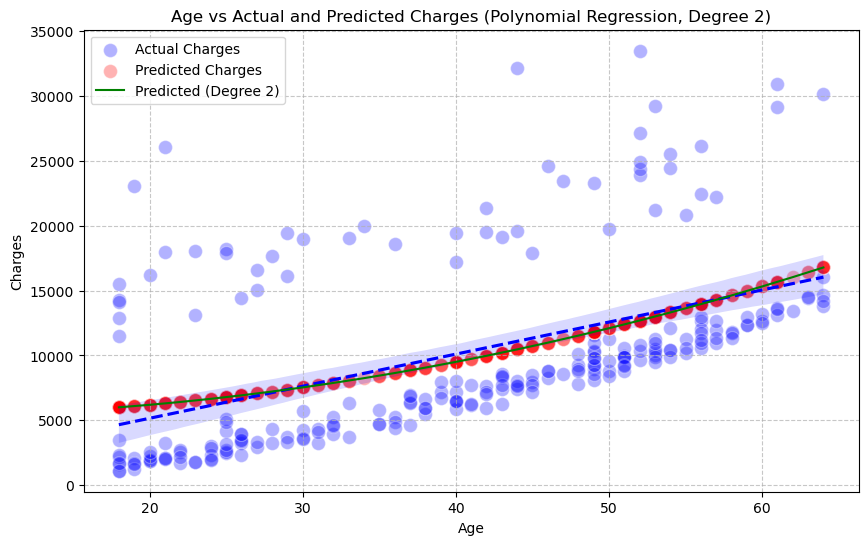

Plot saved as 'age_vs_charges_poly2.png' and stored in 'plots[2]'.

Polynomial Regression (Degree 3):
Mean Squared Error: 36477155.8505
Root Mean Squared Error: 6039.6321
R-squared: 0.2432


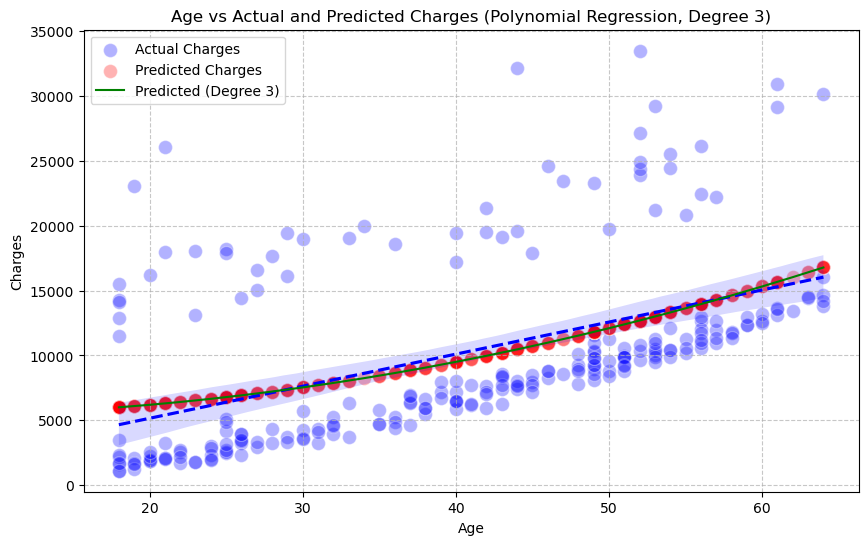

Plot saved as 'age_vs_charges_poly3.png' and stored in 'plots[3]'.

Polynomial Regression (Degree 4):
Mean Squared Error: 36481299.1335
Root Mean Squared Error: 6039.9751
R-squared: 0.2432


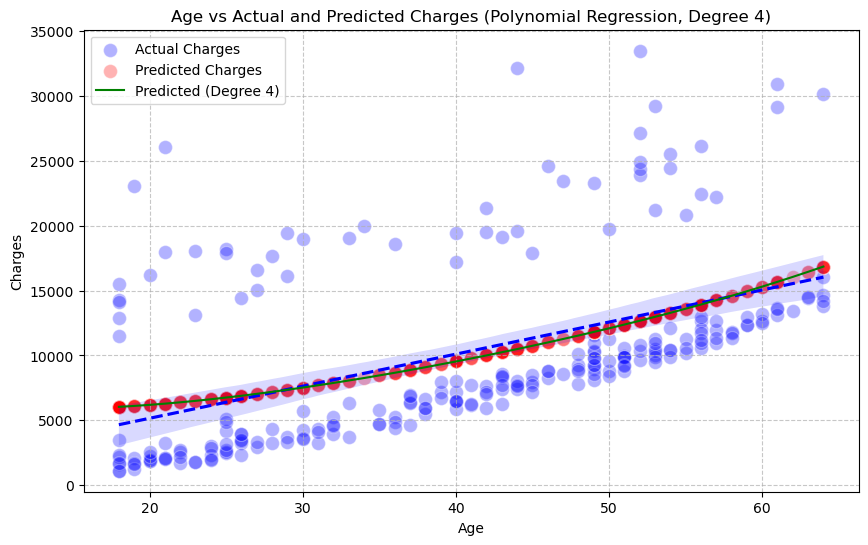

Plot saved as 'age_vs_charges_poly4.png' and stored in 'plots[4]'.

Comparison of Polynomial Degrees:
Degree 2: MSE=36477679.6589, RMSE=6039.6755, R²=0.2432
Degree 3: MSE=36477155.8505, RMSE=6039.6321, R²=0.2432
Degree 4: MSE=36481299.1335, RMSE=6039.9751, R²=0.2432


In [22]:
# Dictionary to store results and plots
results = {}
plots = {}

# Loop over degrees 2, 3, 4
for degree in [2, 3, 4]:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    df_polynomial = df['age'].values.reshape(-1, 1)
    X_poly = polynomial_features.fit_transform(df_polynomial)

    # Split the data
    X = X_poly
    y = df['charges']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[degree] = {'mse': mse, 'rmse': rmse, 'r2': r2}

    print(f"\nPolynomial Regression (Degree {degree}):")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Age': X_test[:, 0],  # First column is original 'age'
        'Actual Charges': y_test,
        'Predicted Charges': y_pred
    })

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot actual charges
    sns.scatterplot(data=plot_data, x='Age', y='Actual Charges', color='blue', label='Actual Charges', alpha=0.3, s=100)

    # Plot predicted charges
    sns.scatterplot(data=plot_data, x='Age', y='Predicted Charges', color='red', label='Predicted Charges', alpha=0.3, s=100)

    # Add regression line for actual data with CI
    sns.regplot(data=plot_data, x='Age', y='Actual Charges', scatter=False, color='blue', 
                line_kws={'linestyle': '--', 'label': 'Actual Trend'}, ci=95)

    # Plot polynomial trend for predicted data
    sorted_indices = np.argsort(plot_data['Age'])
    sorted_age = plot_data['Age'].iloc[sorted_indices]
    sorted_pred = plot_data['Predicted Charges'].iloc[sorted_indices]
    plt.plot(sorted_age, sorted_pred, color='green', linestyle='-', label=f'Predicted (Degree {degree})')

    plt.title(f'Age vs Actual and Predicted Charges (Polynomial Regression, Degree {degree})', fontsize=12)
    plt.xlabel('Age', fontsize=10)
    plt.ylabel('Charges', fontsize=10)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Save the plot
    plt.savefig(f'age_vs_charges_poly{degree}.png', dpi=300, bbox_inches='tight')

    plots[degree] = plt.gcf()

    plt.show()

    print(f"Plot saved as 'age_vs_charges_poly{degree}.png' and stored in 'plots[{degree}]'.")

# Print comparison of results
print("\nComparison of Polynomial Degrees:")
for degree in results:
    print(f"Degree {degree}: MSE={results[degree]['mse']:.4f}, RMSE={results[degree]['rmse']:.4f}, R²={results[degree]['r2']:.4f}")

### Compare the Plots 

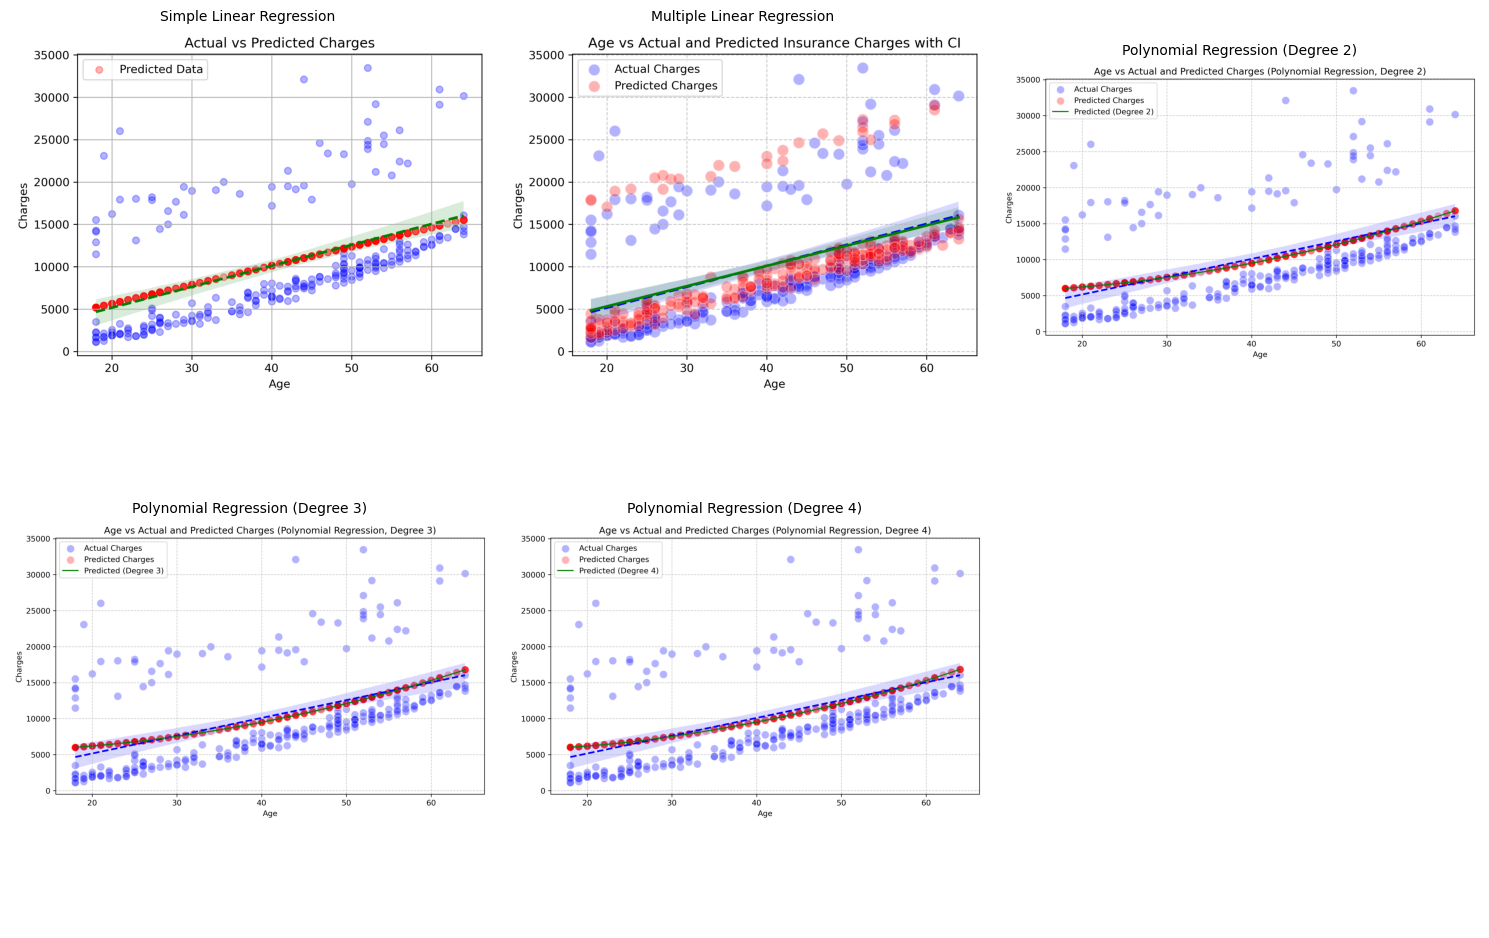

Dashboard saved as 'regression_plots_dashboard.png'.


In [23]:
import matplotlib.image as mpimg


png_files = [
    'age_vs_charges_plot_singel_linear_regg.png', 
    'age_vs_charges_plot_multiple_linear_regg.png', 
    'age_vs_charges_poly2.png',     
    'age_vs_charges_poly3.png',    
    'age_vs_charges_poly4.png'      
]

titles = [
    'Simple Linear Regression ',
    'Multiple Linear Regression ',
    'Polynomial Regression (Degree 2)',
    'Polynomial Regression (Degree 3)',
    'Polynomial Regression (Degree 4)'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Load and display each image
for i, (file, title) in enumerate(zip(png_files, titles)):
    if i < len(axes): 
        img = mpimg.imread(file)
        # Display the image
        axes[i].imshow(img)
        # Set title
        axes[i].set_title(title, fontsize=10)
        # Remove axes for clarity
        axes[i].axis('off')


if len(png_files) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()

plt.savefig('regression_plots_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("Dashboard saved as 'regression_plots_dashboard.png'.")

# **Summary of Findings: Insurance Charges Prediction using Regression Models**

## ***Dataset Overview***

* **Dataset**: Insurance dataset with  patients records
* **Features**: 8 predictors (Age, Sex, BMI, Children, Smoker, Region_Northwest, Region_Southeast, Region_Southwest)
* **Target**: Continuous outcome (Charges, insurance costs in USD)

## ***Preprocessing***

* Removed missing values and duplicates
* Encoded categorical features (Sex, Smoker as binary; Region as one-hot)
* Applied IQR outlier removal to continuous features (Age, BMI, Charges, Children)
* Split dataset into 80% training and 20% testing sets

## ***Model Performance***

* **Simple Linear Regression (Smoker)**:
  * Mean Squared Error: 36915391.5169
  * Root Mean Squared Error: 6075.8038
  * R-squared: 0.2342
* **Multiple Linear Regression**:
  * Mean Squared Error: 22452312.4947
  * Root Mean Squared Error: 4738.3871
  * R-squared: 0.5342
* **Polynomial Regression (Age, Degrees 2/3/4)**:
  * Degree 2: MSE=36477679.6589, RMSE=6039.6755, R²=0.2432
  * Degree 3: MSE=36477155.8505, RMSE=6039.6321, R²=0.2432
  * Degree 4: MSE=36481299.1335, RMSE=6039.9751, R²=0.2432

## ***Visualization Insights***

* **Dashboard**: Combined 5 plots in a 2x3 grid


## ***Feature Importance***
The most significant predictors of Charges were: (correlation)

1. Smoker (0.596230)
2. Age (0.448052)
3. Children (0.088297)
4. BMI (-0.064421RR)

## ***Limitations and Recommendations***
Models showed better performance with Multiple Linear regression
